<a href="https://colab.research.google.com/github/dtsai7/Data-Science-Portfolio/blob/master/twitter_mining_hk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction**

2019 Hong Kong anti-extradiction protests started from March, 2019. Since then, people around the world have been paying close attention to the situation in Hong Kong.

I'm curious about what people are talking about Hong Kong on the Internet. Therefore, I gather some data from Twitter since it is one of the main social media around the world. 

**Problem Statement**
1.   What do people talk about Hong Kong on Twitter?
2.   How do people feel about Hong Kong?



**I. Data Mining**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import collections
import re

import tweepy 
import nltk
from nltk import bigrams
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud

CONSUMER_KEY = 'my consumer key'
CONSUMER_SECRET = 'my consumer secret key'
ACCESS_TOKEN = 'my access token'
ACCESS_SECRET = 'my access secret token'

In [0]:
auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
api = tweepy.API(auth, wait_on_rate_limit = True)

#variables setting for collecting tweets
query = "Hong Kong" + " -filter:retweets" 
date_since = "2019-03-31" # when the anti-extradition bill protests started

#collect tweets
tweets = tweepy.Cursor(api.search, q = query, lang = "en", since = date_since).items(10000)

**II. Data Cleaning**

Data cleaning steps include:
-  Make text all lower case
-  Remove numerical values
-  Remove puncutation

etc.

In [0]:
# data cleaning
import string
def clean_tweet(txt):
    txt = txt.lower()
    txt = re.sub('\[.*?\]', '', txt)
    txt = re.sub('[%s]' % re.escape(string.punctuation), '', txt)
    txt = re.sub('\w*\d\w*', '', txt)
    return txt

tweets_cleaned = [clean_tweet(tweet.text) for tweet in tweets]
tweets_cleaned[5:]

**Data Cleaning Round Two**

More data cleaning steps include
- Remove some additional punctuation
- Remove non-sensical text

In [0]:
def clean_tweet_two(txt):
    txt = re.sub('[‘’“”…]', '', txt)
    txt = re.sub('\n', '', txt)
    return txt

all_tweets_cleaned = [clean_tweet_two(tweet) for tweet in tweets_cleaned]
all_tweets_cleaned[5:]

['hong kong police use water cannon for the first time and at least one officer fires his sidearm during pitched batt ',
 'hong kong police arrest  youngest aged  after running battles with protesters  ',
 'garda investigate death threats against hong kong demonstrators ',
 'hong kongs gestapo police at work a bit over the top ',
 'realpersonpltcs thebestcloser boogiebumper speakertimjones nickbschroer any questions about who hong kong want ',
 'hong kong police arrest  youngest aged  after running battles with protesters ',
 'hong kong protests police use water cannon on demonstrators ',
 'charleshancock jojojoheeley and they got the audacity to criticize hong kong free speech what a joke ',
 'stillgray saw a video today where hong kong protesters were swatting tear gas canisters back at the police using t ',
 'berniesanders still stand with hong kong 🤣🤣🤣😂😂😂😂🤣 httpstcooqncmhqzra',
 'a first birthday ends in tears and tear gas for one hong kong family ',
 'well then how can you support

**III. Sentiment Analysis**

To answer my second problem, I will do sentiment analysis based on the cleaned data.

In [0]:
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'
    
sentiment_value = [[get_sentiment(tweet), 
                    TextBlob(tweet).sentiment.polarity, 
                    TextBlob(tweet).sentiment.subjectivity, 
                    str(tweet)] 
                   for tweet in all_tweets_cleaned]
sentiment_value[5:]

In [0]:
# into dataframe
sentiment_df = pd.DataFrame(sentiment_value, columns = ["Polarity", "Polarity_num", "Subjectivity", "tweet"])
sentiment_df.head()

,Polarity,Polarity_num,Subjectivity,tweet
0,Neutral,0.000000,0.000000,patrick cheung alice leung john timpany irene ...
1,Negative,-0.111111,0.222222,american youth need to take notes on what the ...
2,Neutral,0.000000,0.000000,prisonplanet david vs goliath i think hong kon...
3,Neutral,0.000000,0.000000,the woman from mainland china in hong kong is ...
4,Positive,0.500000,0.500000,why is the whitehouse the statedept the gop an...


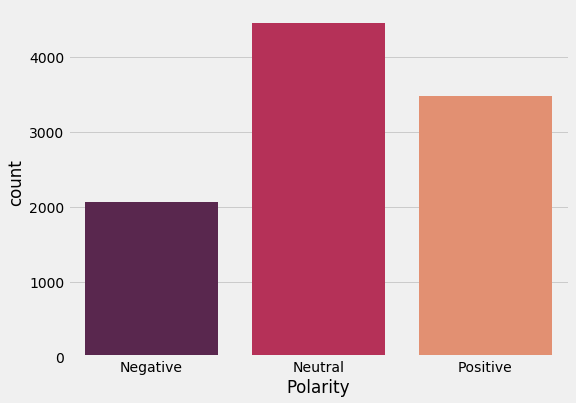

In [0]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Polarity', order = ['Negative', 'Neutral', 'Positive'], data = sentiment_df, palette='rocket')

**Findings**


- Most tweets are neutral.
- More positive tweets than negative ones.



**IV. Tokenize Words**

In [0]:
words_in_tweet = [tweet.lower().split() for tweet in all_tweets_cleaned]
words_in_tweet[3:]

In [0]:
all_words = list(itertools.chain(*words_in_tweet))
word_count = collections.Counter(all_words)
word_count.most_common(20)

[('hong', 8426),
 ('kong', 7937),
 ('the', 5337),
 ('in', 3264),
 ('to', 2873),
 ('of', 2581),
 ('and', 2525),
 ('police', 2298),
 ('a', 2059),
 ('is', 1813),
 ('for', 1341),
 ('protesters', 1333),
 ('on', 1234),
 ('protests', 1118),
 ('are', 1092),
 ('with', 1059),
 ('china', 1032),
 ('i', 1027),
 ('you', 923),
 ('as', 856)]

In [0]:
# Exclude stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
tweets_nsw = [[word for word in tweet_words 
               if not word in stop_words]
              for tweet_words in words_in_tweet]
tweets_nsw[0:2]

In [0]:
# exclude "hongkong", "hong", "kong"
collection_words = ['hongkong', 'hong', 'kong']
tweets_nsw_nc = [[w for w in word if not w in collection_words]
                 for word in tweets_nsw]
new_all_words_nc = list(itertools.chain(*tweets_nsw_nc))
new_word_count_nc = collections.Counter(new_all_words_nc)
new_word_count_nc.most_common(20)

[('police', 2298),
 ('protesters', 1333),
 ('protests', 1118),
 ('china', 1032),
 ('people', 735),
 ('water', 704),
 ('via', 588),
 ('protest', 503),
 ('fire', 464),
 ('cannon', 423),
 ('chinese', 392),
 ('new', 373),
 ('use', 371),
 ('shot', 364),
 ('guns', 364),
 ('youtube', 315),
 ('first', 308),
 ('arrest', 304),
 ('time', 298),
 ('violence', 279)]

**V. Word Count**

In [0]:
clean_tweets_ncw = pd.DataFrame(new_word_count_nc.most_common(20),
                             columns=['words', 'count'])
clean_tweets_ncw.head()

,words,count
0,police,2298
1,protesters,1333
2,protests,1118
3,china,1032
4,people,735


Use graph for data visualization

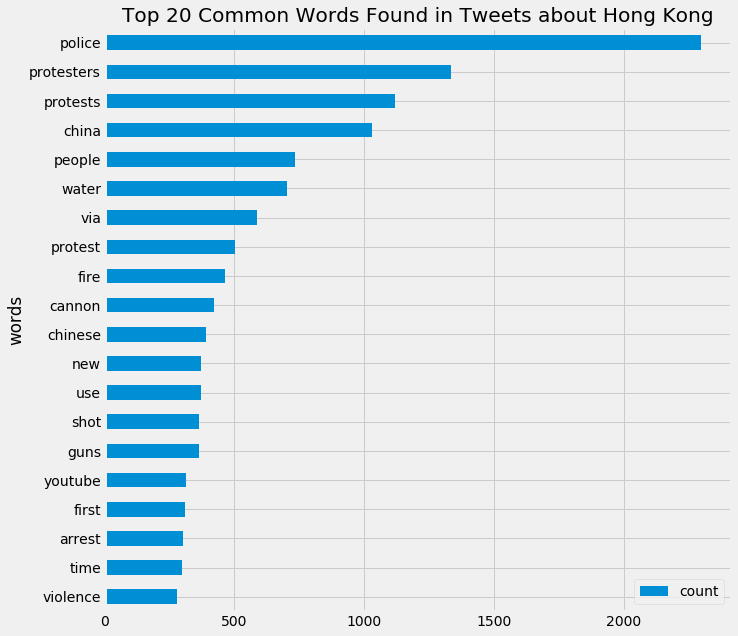

In [0]:
fig, ax = plt.subplots(figsize=(10, 10))

clean_tweets_ncw.sort_values(by='count').plot.barh(x= 'words',y= 'count',ax= ax)
ax.set_title("Top 20 Common Words Found in Tweets about Hong Kong")
plt.show()

**Findingss**
- Most common words found in tweets are protests-related, including police, protesters, protests, people and China. 
Most tweets are mainly about the act of police.

Now...
Let's try word cloud! 
(But with 2000 common words to make word cloud more dense)

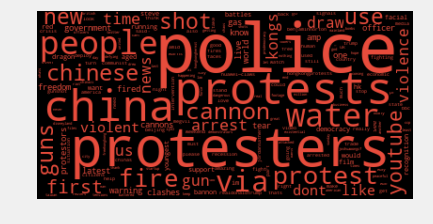

In [0]:
d = {}
for a, x in clean_tweets_ncw.values:
    d[a] = x

from wordcloud import WordCloud

wordcloud = WordCloud(max_font_size= 72, color_func=lambda *args, **kwargs: (231,76,60))
wordcloud.generate_from_frequencies(frequencies= d)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

How about word cloud with the flag of Hong Kong as mask?

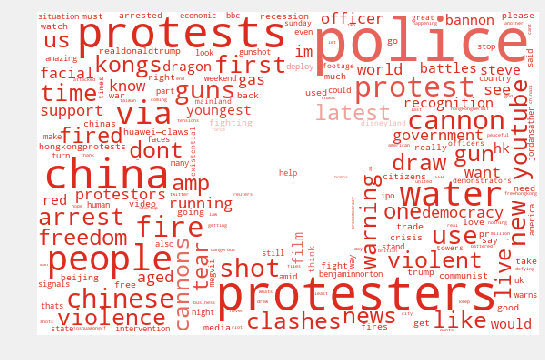

In [0]:
from os import path
from PIL import Image
from wordcloud import ImageColorGenerator

mask = np.array(Image.open("/hk.png"))
wordcloud = WordCloud(background_color="white", mode = "RGBA", mask = mask)
wordcloud.generate_from_frequencies(frequencies= d)
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[8,8])
plt.imshow(wordcloud.recolor(color_func= image_colors))
plt.axis("off")

plt.show()

**Findings**
- I got goose bumps while seeing the word in the middle, which is "help"! 
- More words became conspicuous in this one campared with the formor one.
- Some news media were mentioned in the tweets a lot as well, such as: "BBC" and "Reuters" since they cover the news. Moreover, "Benjamin Norton", an American journalist, was also mentioned quite often in people's tweets.

